# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string)) 
    
# Note : Using printmd function to print text in bold format.

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [3]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
printmd("**The datatypes of each columns**")
print(df.dtypes)
printmd("**The shape of the dataset**")
print(df.shape)
print("Number of Rows = {0}\nNumber of Columns = {1}".format(df.shape[0],df.shape[1]))

**The datatypes of each columns**

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object


**The shape of the dataset**

(699, 11)
Number of Rows = 699
Number of Columns = 11


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [10]:
printmd("**Checking the presence of '?' values.**")
df.isin(['?']).sum()

**Checking the presence of '?' values.**

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [11]:
# Replacing with NaN value so we can compute mean, median or mode
df['Bare Nuclei'].replace(to_replace='?',value=np.NaN,inplace=True)

In [12]:
df['Bare Nuclei'].isin(['?']).sum() 

0

In [13]:
mean_Bare_Nuclei=df['Bare Nuclei'].astype(float).mean()
median_Bare_Nuclei=df['Bare Nuclei'].astype(float).median()
print(mean_Bare_Nuclei)
print(median_Bare_Nuclei)

3.5446559297218156
1.0


In [14]:
# Filling NaN values with Median value
df['Bare Nuclei'].fillna(value=median_Bare_Nuclei,inplace=True)

In [15]:
# Finding Duplicate values
df_duplicate=df[df.duplicated(['ID'], keep='first')]
printmd("**Number of duplicate records**")
print(df_duplicate.shape[0])
df_duplicate

**Number of duplicate records**

54


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
9,1033078,4,2,1,1,2,1,2,1,1,2
30,1070935,3,1,1,1,1,1,2,1,1,2
82,1143978,5,2,1,1,2,1,3,1,1,2
109,1171710,6,5,4,4,3,9,7,8,3,4
116,1173347,8,3,3,1,2,2,3,2,1,2
121,1174057,4,2,1,1,2,2,3,1,1,2
195,1212422,4,1,1,1,2,1,3,1,1,2
208,1218860,1,1,1,1,1,1,3,1,1,2
252,1017023,6,3,3,5,3,10,3,5,3,2
253,1100524,6,10,10,2,8,10,7,3,3,4


In [16]:
printmd("**Checking the presence of missing values.**")
df.isnull().sum()

**Checking the presence of missing values.**

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
printmd("**Dropping duplicate values.**")
df.drop_duplicates(subset='ID',keep='first', inplace=True)
print("Number of Rows = {0}\nNumber of Columns = {1}".format(df.shape[0],df.shape[1]))


**Dropping duplicate values.**

Number of Rows = 645
Number of Columns = 11


In [18]:
printmd("**Number of Unique values in each attribute.**")
df.nunique()

**Number of Unique values in each attribute.**

ID                             645
ClumpThickness                  10
Cell Size                       10
Cell Shape                      10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     11
Normal Nucleoli                 10
Bland Chromatin                 10
Mitoses                          9
Class                            2
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [19]:
# Check for correlation of variable

In [20]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [21]:
#Let us check for pair plots

In [22]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [23]:
printmd("**Dropping ID column as it doesn't make sense to include it in correlation**")
df.drop('ID',inplace=True,axis=1)

**Dropping ID column as it doesn't make sense to include it in correlation**

In [24]:
df['Bare Nuclei']=df['Bare Nuclei'].astype(float)
df.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [25]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644764,0.655972,0.484922,0.515168,0.588592,0.561261,0.534934,0.346201,0.724706
Cell Size,0.644764,1.000000,0.903802,0.711410,0.749046,0.676439,0.761042,0.728274,0.457109,0.817567
Cell Shape,0.655972,0.903802,1.000000,0.685744,0.712025,0.699127,0.735134,0.722408,0.434820,0.815828
Marginal Adhesion,0.484922,0.711410,0.685744,1.000000,0.600940,0.668669,0.665414,0.593902,0.403777,0.700035
Single Epithelial Cell Size,0.515168,0.749046,0.712025,0.600940,1.000000,0.575498,0.617320,0.629214,0.480421,0.678963
Bare Nuclei,0.588592,0.676439,0.699127,0.668669,0.575498,1.000000,0.671989,0.566675,0.330329,0.817334
Normal Nucleoli,0.561261,0.761042,0.735134,0.665414,0.617320,0.671989,1.000000,0.663497,0.328683,0.755289
Bland Chromatin,0.534934,0.728274,0.722408,0.593902,0.629214,0.566675,0.663497,1.000000,0.414202,0.710121
Mitoses,0.346201,0.457109,0.434820,0.403777,0.480421,0.330329,0.328683,0.414202,1.000000,0.419997
Class,0.724706,0.817567,0.815828,0.700035,0.678963,0.817334,0.755289,0.710121,0.419997,1.000000


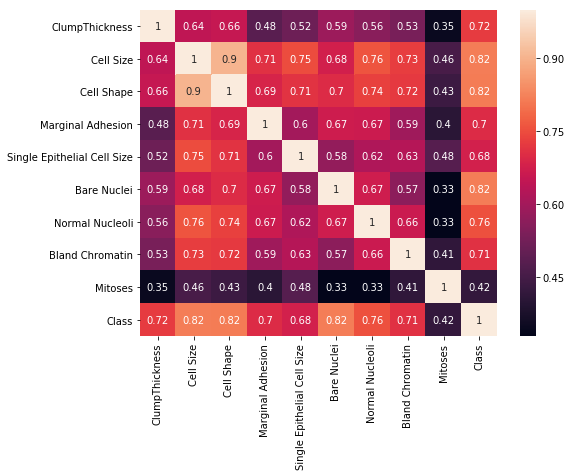

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [27]:
df['Bare Nuclei']=df['Bare Nuclei'].astype(float)
df.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

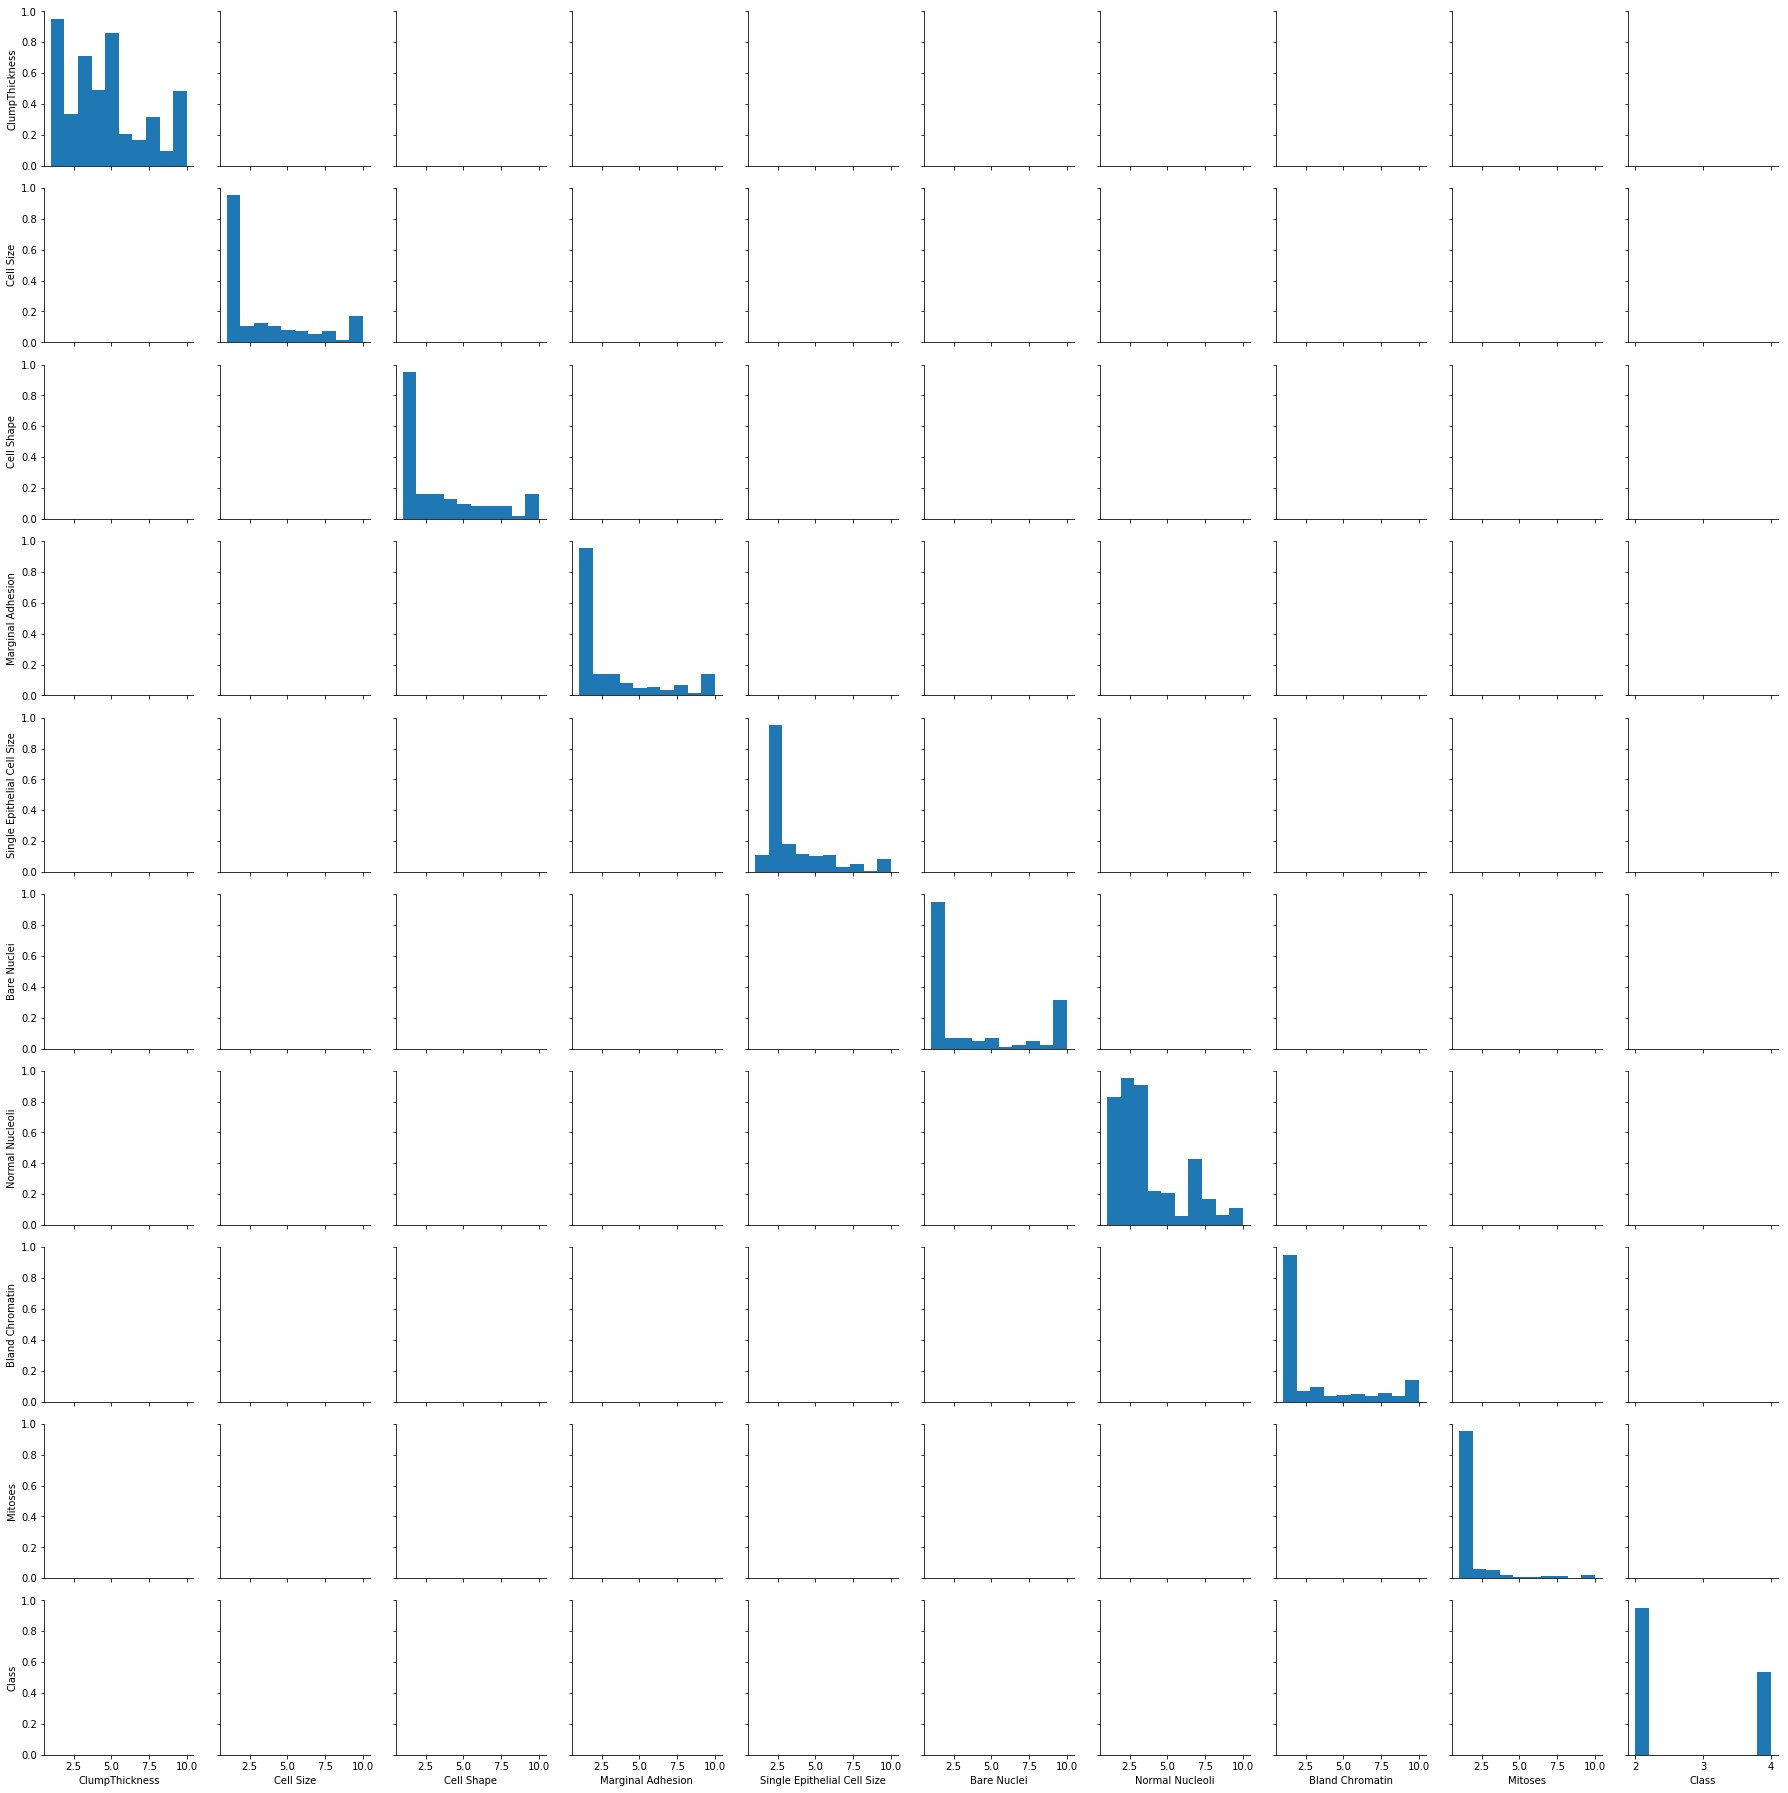

In [28]:
sns.pairplot(df,kind='kde')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [29]:
# We could see most of the outliers are now removed.

**Finding Outliers in each attribute using boxplot**

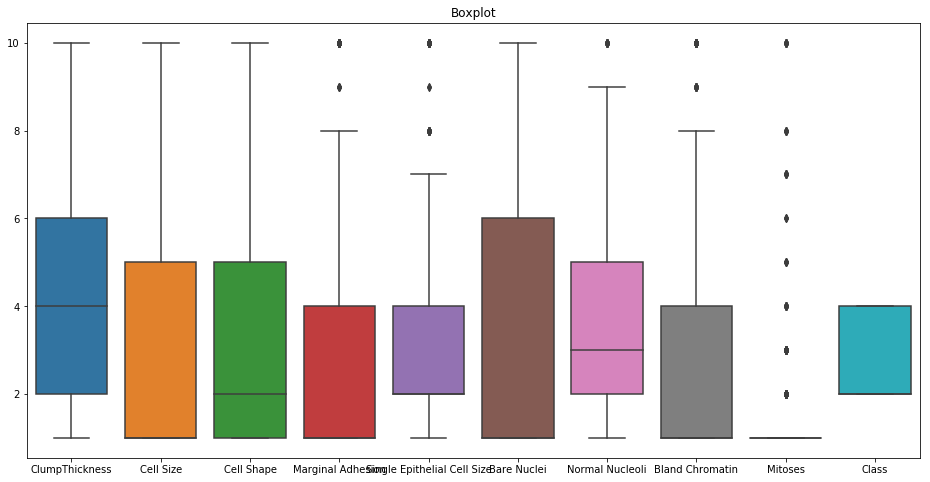

In [30]:
printmd("**Finding Outliers in each attribute using boxplot**")
plt.figure(figsize=(16,8))
plt.title("Boxplot")
sns.boxplot(data=df)

We can see outliers in below columns,

1. Marginal Adhesion
2. Single Epithelial Cell Size
3. Normal Nucleoli
4. Bland Chromatin
5. Mitoses

In [31]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,645.0,4.471318,2.858115,1.0,2.0,4.0,6.0,10.0
Cell Size,645.0,3.182946,3.059049,1.0,1.0,1.0,5.0,10.0
Cell Shape,645.0,3.269767,2.985748,1.0,1.0,2.0,5.0,10.0
Marginal Adhesion,645.0,2.893023,2.918036,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,645.0,3.275969,2.247455,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,645.0,3.559690,3.647715,1.0,1.0,1.0,6.0,10.0
Normal Nucleoli,645.0,3.497674,2.459374,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,645.0,2.955039,3.120682,1.0,1.0,1.0,4.0,10.0
Mitoses,645.0,1.613953,1.744056,1.0,1.0,1.0,1.0,10.0
Class,645.0,2.719380,0.960564,2.0,2.0,2.0,4.0,4.0


In [32]:
# Checking values which are greater than whisker values before removing outliers
print(df['Marginal Adhesion'][df['Marginal Adhesion']>8].value_counts().sum())
print(df['Single Epithelial Cell Size'][df['Single Epithelial Cell Size']>7].value_counts().sum())
print(df['Normal Nucleoli'][df['Normal Nucleoli']>9].value_counts().sum())
print(df['Bland Chromatin'][df['Bland Chromatin']>8].value_counts().sum())
print(df['Mitoses'][df['Mitoses']>1].value_counts().sum())

59
52
18
76
115


In [33]:
print(df['Marginal Adhesion'].quantile(0.75))
print(df['Single Epithelial Cell Size'].quantile(0.75))
print(df['Normal Nucleoli'].quantile(0.75))
print(df['Bland Chromatin'].quantile(0.75))
print(df['Mitoses'].quantile(0.75))

4.0
4.0
5.0
4.0
1.0


Replacing with 75% percentile values

In [34]:
df['Marginal Adhesion'][df['Marginal Adhesion']>8]=df['Marginal Adhesion'].quantile(0.75)

In [35]:
df['Single Epithelial Cell Size'][df['Single Epithelial Cell Size']>7]=df['Single Epithelial Cell Size'].quantile(0.75)

In [36]:
df['Normal Nucleoli'][df['Normal Nucleoli']>9]=df['Normal Nucleoli'].quantile(0.75)

In [37]:
df['Bland Chromatin'][df['Bland Chromatin']>8]=df['Bland Chromatin'].quantile(0.75)

In [38]:
df['Mitoses'][df['Mitoses']>1]=df['Mitoses'].quantile(0.75)

In [39]:
# Checking values which are greater than whisker values after removing outliers
print(df['Marginal Adhesion'][df['Marginal Adhesion']>8].value_counts().sum())
print(df['Single Epithelial Cell Size'][df['Single Epithelial Cell Size']>7].value_counts().sum())
print(df['Normal Nucleoli'][df['Normal Nucleoli']>9].value_counts().sum())
print(df['Bland Chromatin'][df['Bland Chromatin']>8].value_counts().sum())
print(df['Mitoses'][df['Mitoses']>1].value_counts().sum())

0
0
0
0
0


In [40]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class,2,4
Marginal Adhesion,,
1,337,31
2,36,18
3,27,26
4,7,84
5,2,17
6,4,18
7,0,13
8,0,25


In [41]:
# df['Marginal Adhesion']=np.where(df['Marginal Adhesion']>4,4,df['Marginal Adhesion'])

**Checking  for Outliers After Treatment**

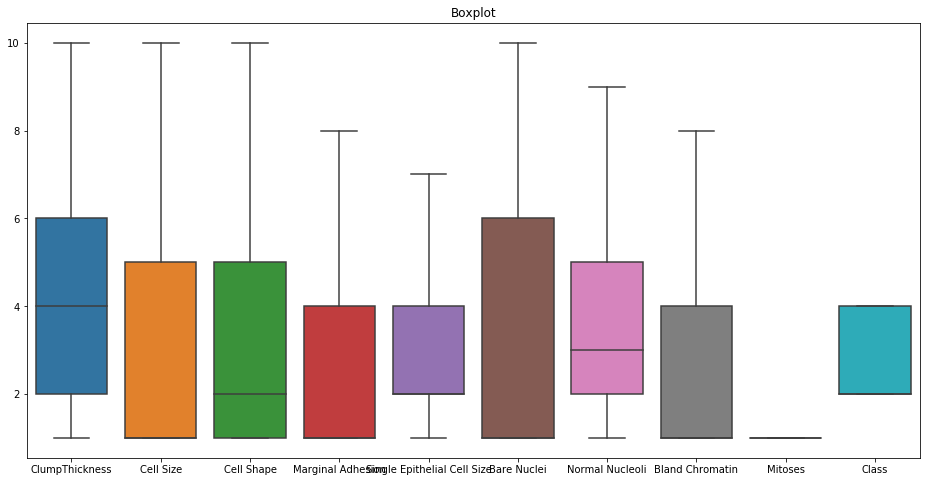

In [42]:
printmd("**Checking  for Outliers After Treatment**")
plt.figure(figsize=(16,8))
plt.title("Boxplot")
sns.boxplot(data=df)

# Q6 Create a covariance matrix for identifying Principal components

In [43]:
# PCA
# Step 1 - Create covariance matrix


In [44]:
X= df.drop('Class',axis=1)
X.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std =  scaler.fit_transform(X)
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.0015528  0.64576496 0.65699092 0.49124862 0.53079914 0.58950616
  0.56309239 0.51673451 0.        ]
 [0.64576496 1.0015528  0.90520515 0.69067357 0.73380114 0.6774891
  0.725848   0.65666416 0.        ]
 [0.65699092 0.90520515 1.0015528  0.65619951 0.70779938 0.70021306
  0.70298946 0.63643468 0.        ]
 [0.49124862 0.69067357 0.65619951 1.0015528  0.63816968 0.64441581
  0.65975317 0.5776715  0.        ]
 [0.53079914 0.73380114 0.70779938 0.63816968 1.0015528  0.61497867
  0.62511979 0.61854678 0.        ]
 [0.58950616 0.6774891  0.70021306 0.64441581 0.61497867 1.0015528
  0.68258831 0.5768511  0.        ]
 [0.56309239 0.725848   0.70298946 0.65975317 0.62511979 0.68258831
  1.0015528  0.61329607 0.        ]
 [0.51673451 0.65666416 0.63643468 0.5776715  0.61854678 0.5768511
  0.61329607 1.0015528  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [46]:
# Step 2- Get eigen values and eigen vector

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.31713666  0.00876171 -0.8186989  -0.05233146  0.13684663  0.19832614
  -0.38043892  0.15345057  0.        ]
 [ 0.38865151  0.72756533 -0.05410431 -0.06838709 -0.37088197 -0.25456343
   0.27490745  0.18456583  0.        ]
 [ 0.38418957 -0.67466311 -0.13909158 -0.03690255 -0.35854673 -0.37035879
   0.32164495  0.08569088  0.        ]
 [ 0.34277449 -0.05779594  0.42603663  0.38046393  0.02289837 -0.14248921
  -0.56441822  0.46207124  0.        ]
 [ 0.35050383 -0.04091894  0.23508659 -0.24831088 -0.47791284  0.47222574
  -0.29538453 -0.46893374  0.        ]
 [ 0.35102565  0.0875887  -0.04029792  0.44631753  0.34840797 -0.30525069
   0.01452768 -0.67343062  0.        ]
 [ 0.35723267 -0.04969142  0.11763123  0.265619    0.27278331  0.62780863
   0.51970445  0.21651304  0.        ]
 [ 0.33104568 -0.01567987  0.2349988  -0.71767606  0.53892479 -0.16756069
  -0.0106273   0.03535642  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [48]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.532630048454758, array([0.31713666, 0.38865151, 0.38418957, 0.34277449, 0.35050383,
       0.35102565, 0.35723267, 0.33104568, 0.        ])), (0.5475806931471284, array([-0.8186989 , -0.05410431, -0.13909158,  0.42603663,  0.23508659,
       -0.04029792,  0.11763123,  0.2349988 ,  0.        ])), (0.4565739991267257, array([-0.05233146, -0.06838709, -0.03690255,  0.38046393, -0.24831088,
        0.44631753,  0.265619  , -0.71767606,  0.        ])), (0.41681379034141197, array([ 0.13684663, -0.37088197, -0.35854673,  0.02289837, -0.47791284,
        0.34840797,  0.27278331,  0.53892479,  0.        ])), (0.34310759662630014, array([-0.38043892,  0.27490745,  0.32164495, -0.56441822, -0.29538453,
        0.01452768,  0.51970445, -0.0106273 ,  0.        ])), (0.3287742136339744, array([ 0.15345057,  0.18456583,  0.08569088,  0.46207124, -0.46893374,
       -0.67343062,  0.21651304,  0.03535642,  0.        ])), (0.2952998903280303, array([ 0.19832614, -0.25456343, -0.37035879, -0.1424892

In [49]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

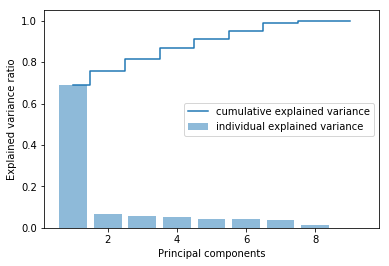

In [50]:
plt.bar([1,2,3,4,5,6,7,8,9], var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step([1,2,3,4,5,6,7,8,9],cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [51]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7) 
X=pca.fit_transform(X)

In [52]:
print(pca.explained_variance_ratio_)

[0.71849677 0.08437564 0.06976486 0.04040025 0.03078343 0.02689261
 0.01558107]


# Q10 Find correlation between components and features

In [53]:
col_names=df.drop('Class',axis=1).columns
col_names

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'],
      dtype='object')

In [54]:
df_comp=pd.DataFrame(pca.components_,columns=col_names)

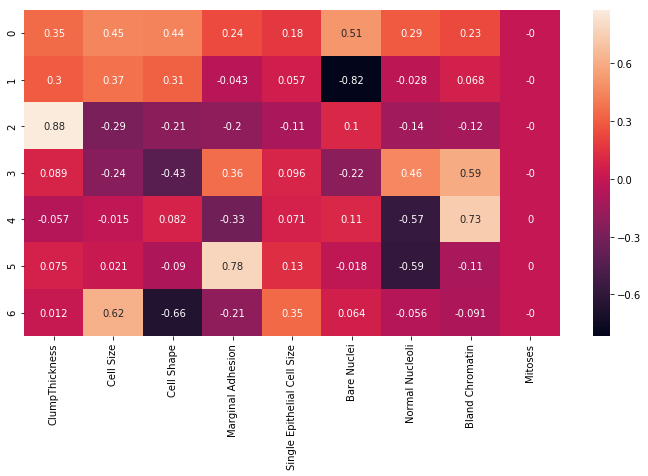

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [56]:
df_jk=pd.read_csv("jokes.csv")
df_jk.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 697
Data columns (total 10 columns):
ClumpThickness                 645 non-null int64
Cell Size                      645 non-null int64
Cell Shape                     645 non-null int64
Marginal Adhesion              645 non-null int64
Single Epithelial Cell Size    645 non-null int64
Bare Nuclei                    645 non-null float64
Normal Nucleoli                645 non-null int64
Bland Chromatin                645 non-null int64
Mitoses                        645 non-null int64
Class                          645 non-null int64
dtypes: float64(1), int64(9)
memory usage: 75.4 KB


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [58]:
ratings=df_jk.iloc[0:200,1:]
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [59]:
ratings.replace(to_replace=99,value=0,inplace=True)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [60]:
ratings.isin([99]).sum().sum()

0

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [61]:
rating_diff=ratings.mean(axis=0)

In [62]:
rating_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64